### 무게 찾기 
 - 목표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
 - 데이터셋 : fish.csv
 - 피쳐/속성 : Length
 - 타겟/라벨 : Weight
 - 학습 방법 : 지도학습 > 회귀
 - 알고리즘 : 선형회귀  >>> 데이터 분포가 선형의 형태

- 다중회귀 - 피쳐가 많은거
- 다항회귀 - 항(구해야하는 선의 차수가 2차 이상인거)이 큰거

In [137]:
# 모듈 로딩
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures

In [113]:
file = '../data/fish.csv'
fishDF = pd.read_csv(file, usecols=['Weight','Length','Species'])

In [114]:
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [115]:
# oneDF으로 Perch만 골라서 저장
mask = (fishDF['Species'] == "Perch")
oneDF = fishDF[mask]
oneDF.reset_index(drop=True, inplace=True)
oneDF.index

RangeIndex(start=0, stop=56, step=1)

In [116]:
oneDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


In [117]:
import matplotlib.pyplot as plt

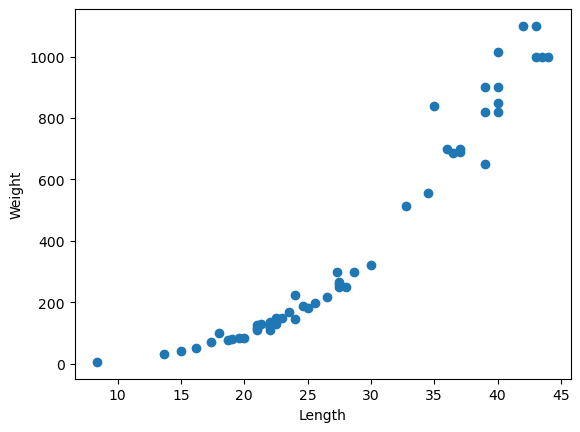

In [118]:
# 시각화
plt.scatter(oneDF['Length'], oneDF['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

- 종속변수 : 무게 
- 독립변수 : 길이

In [119]:
target = oneDF['Weight']
feature = oneDF[['Length']]

In [120]:
feature.ndim, feature.shape, target.shape

(2, (56, 1), (56,))

In [121]:
#stratify 종속변수에 포함 된애를 분해해주기위해 >> 그래서 어제 회귀에서는 필요없어 분류에서는 필요하다는게 그 이유

In [122]:
x_train, x_test, y_train, y_test = train_test_split(feature,
                                                    target)

In [123]:
model = LinearRegression()

In [127]:
model.fit(x_train, y_train)

LinearRegression()

In [128]:
print(f'model.coef_ : {len(model.coef_)}개, {model.coef_}')
print(f'model.intercept_ : {model.intercept_}')

model.coef_ : 1개, [37.05054717]
model.intercept_ : -646.5493799941739


In [132]:
pre_jumsu = model.predict(x_train)

In [134]:
mse = mean_squared_error(y_train, pre_jumsu)
rmse = mean_squared_error(y_train, pre_jumsu, squared=False)
mea = mean_absolute_error(y_train, pre_jumsu) 
r2 = r2_score(y_train, pre_jumsu)

In [135]:
print(mse, rmse, mea, r2, sep='\n')

11472.22524151626
107.10847418162702
83.25535399885787
0.9097472090986021


In [136]:
x_train.shape, y_train.shape

((42, 1), (42,))

In [185]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train)
poly.get_feature_names_out()

array(['Length', 'Length^2', 'Length^3', 'Length^4', 'Length^5'],
      dtype=object)

In [186]:
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

In [187]:
linear_model = LinearRegression()

linear_model.fit(x_train_poly, y_train)

LinearRegression()

In [189]:
linear_model.coef_, linear_model.intercept_

(array([-1.00693090e+02,  1.13156123e+01, -5.77027939e-01,  1.42439497e-02,
        -1.27288392e-04]),
 329.72409531231216)

회귀식 : Weight = 127.7 -22.6*Length + 1.03*Length^2

In [190]:
x = np.linspace(10, 45, 1000)
y = linear_model.intercept_ + x*linear_model.coef_[0] + (x**2)*linear_model.coef_[1] + (x**3)*linear_model.coef_[2] + (x**4)*linear_model.coef_[3] + (x**5)*linear_model.coef_[4]

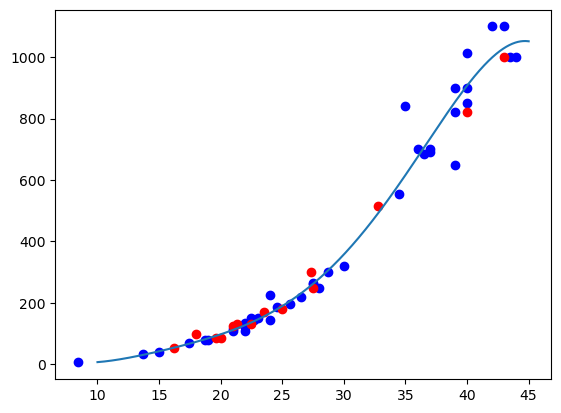

In [191]:
plt.scatter(x_train, y_train, color = 'blue')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x, y)

In [192]:
linear_model.score(x_train_poly, y_train)

0.9734926048759401

In [193]:
linear_model.score(x_test_poly, y_test)

0.988622195797607